#### Read the dataset

In [50]:
r_file = open('reviews.txt','r')
reviews=list(map(lambda x:x[:-1],r_file.readlines()))
r_file.close()

l_file = open('labels.txt','r')
labels = list(map(lambda x:x[:-1].upper(),l_file.readlines()))
l_file.close()

In [51]:
# Length of reviews
len(reviews)

25000

In [52]:
reviews[0]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teachers  . the scramble to survive financially  the insightful students who can see right through their pathetic teachers  pomp  the pettiness of the whole situation  all remind me of the schools i knew and their students . when i saw the episode in which a student repeatedly tried to burn down the school  i immediately recalled . . . . . . . . . at . . . . . . . . . . high . a classic line inspector i  m here to sack one of your teachers . student welcome to bromwell high . i expect that many adults of my age think that bromwell high is far fetched . what a pity that it isn  t   '

In [53]:
labels[0]

'POSITIVE'

#### Here lets initiate the counter and count number repeatation of unique words 

In [63]:
from collections import Counter
import numpy as np

positive_counts = Counter()
negative_counts = Counter()
total_counts = Counter()

for i in range(len(reviews)):
    if(labels[i]=='POSITIVE'):
        for word in reviews[i].split(" "):
            positive_counts[word]+=1
            total_counts[word]+=1
    else:
        for word in reviews[i].split(" "):
            negative_counts[word] += 1
            total_counts[word] += 1

#### The following displays the most common words alongs

In [64]:
positive_counts

Counter({'bromwell': 8,
         'high': 1095,
         'is': 57245,
         'a': 83688,
         'cartoon': 249,
         'comedy': 1742,
         '.': 159654,
         'it': 48025,
         'ran': 122,
         'at': 11234,
         'the': 173324,
         'same': 1972,
         'time': 6515,
         'as': 26308,
         'some': 7441,
         'other': 4858,
         'programs': 39,
         'about': 8313,
         'school': 783,
         'life': 4199,
         '': 550468,
         'such': 2590,
         'teachers': 35,
         'my': 6488,
         'years': 2758,
         'in': 50215,
         'teaching': 40,
         'profession': 37,
         'lead': 630,
         'me': 5167,
         'to': 66746,
         'believe': 1071,
         'that': 35630,
         's': 33815,
         'satire': 136,
         'much': 4685,
         'closer': 126,
         'reality': 605,
         'than': 4736,
         'scramble': 2,
         'survive': 147,
         'financially': 20,
         'insightf

In [66]:
total_counts

Counter({'bromwell': 8,
         'high': 2161,
         'is': 107328,
         'a': 163009,
         'cartoon': 545,
         'comedy': 3246,
         '.': 327192,
         'it': 96352,
         'ran': 238,
         'at': 23513,
         'the': 336713,
         'same': 4053,
         'time': 12724,
         'as': 46933,
         'some': 15747,
         'other': 9163,
         'programs': 66,
         'about': 17374,
         'school': 1659,
         'life': 6628,
         '': 1111930,
         'such': 5134,
         'teachers': 77,
         'my': 12503,
         'years': 4517,
         'in': 93968,
         'teaching': 82,
         'profession': 65,
         'lead': 1310,
         'me': 10773,
         'to': 135720,
         'believe': 2505,
         'that': 73245,
         's': 65361,
         'satire': 261,
         'much': 9763,
         'closer': 206,
         'reality': 987,
         'than': 9919,
         'scramble': 6,
         'survive': 260,
         'financially': 29,
       

#### As you can see above some of the words are common in positive as well as in negative reviews but the number of repeatations are different. Let's find the ratio of positive to negative ratio

In [69]:
pos_neg_ratios = Counter()
for t,c in list(total_counts.most_common()):
    if (c>100):
        pos_neg_ratio=np.log(positive_counts[t]/float(negative_counts[t]+1))
        pos_neg_ratios[t]=pos_neg_ratio
        

In [79]:
vocab = set(total_counts.keys())
vocab_size = len(vocab)
print(vocab_size)

74074


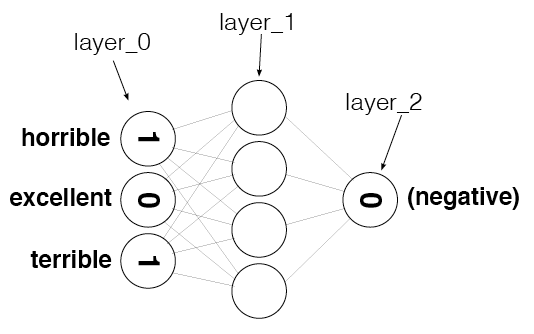

In [80]:
from IPython.display import Image
Image(filename='sentiment_network_2.png')

#### Lets create a numpy array for layer zero and itiatialize all the values to zero

In [84]:
layer_zero = np.zeros((1,vocab_size))
layer_zero.shape

(1, 74074)

#### Layer zero contains one cell for one word. It is essential to dictionary 

In [85]:
word2index = {}
for i,w in enumerate(vocab):
    word2index[w]=i
word2index

{'': 0,
 'sacraments': 1,
 'distant': 2,
 'baskervilles': 3,
 'brood': 4,
 'zaphod': 5,
 'understands': 6,
 'mettle': 7,
 'rabbeted': 8,
 'blockades': 9,
 'bathsheba': 10,
 'rosemary': 11,
 'rastin': 12,
 'intermittently': 13,
 'hitters': 14,
 'decent': 15,
 'conveys': 16,
 'barnwell': 17,
 'catcalls': 18,
 'independence': 19,
 'pressure': 20,
 'favortie': 21,
 'choronzhon': 22,
 'zig': 23,
 'puppies': 24,
 'klutz': 25,
 'tsu': 26,
 'gins': 27,
 'hypocritically': 28,
 'guarantee': 29,
 'deeply': 30,
 'bukowski': 31,
 'duplicated': 32,
 'erector': 33,
 'misato': 34,
 'negotiation': 35,
 'carolingians': 36,
 'whites': 37,
 'uden': 38,
 'huh': 39,
 'boldness': 40,
 'risa': 41,
 'excretion': 42,
 'janes': 43,
 'enlightenment': 44,
 'defenselessly': 45,
 'incarnate': 46,
 'puckett': 47,
 'readings': 48,
 'dinah': 49,
 'gainfully': 50,
 'toker': 51,
 'concensus': 52,
 'endeared': 53,
 'angasm': 54,
 'harborfest': 55,
 'waldsterben': 56,
 'allright': 57,
 'razzle': 58,
 'swans': 59,
 'vicious